In [ ]:
!pip install mpl-finance

In [ ]:
from mpl_finance import candlestick2_ohlc
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import pandas as pd 
from datetime import datetime

# COIN_LIST=['BTC','BCH','BTG','BSV','BCHA','LTC',]
COIN_LIST=['BTC']#,'BCH','BTG','BSV','BCHA','LTC','EOS','ETH','ETC','ZIL','ADA','XRP','DOT','XLM','ATOM']

In [ ]:
from PIL import Image, ImageChops

def trim(im):
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    diff.show()
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)



# Candle + TradeVolume

In [ ]:
from mpl_finance import candlestick2_ohlc
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import pandas as pd 
from datetime import datetime

# COIN_LIST=['BTC','BCH','BTG','BSV','BCHA','LTC',]
COIN_LIST=['BTC','BCH','BTG','BSV','BCHA','LTC','EOS','ETH','ETC','ZIL','ADA','XRP','DOT','XLM','ATOM']


img_w=70
img_h=50
term=20
linewidth=0.7
candle_width=0.7
figsize = (1, img_h/img_w) if img_h>=img_w else (img_w/img_h, 1)
print(figsize)
for coin in COIN_LIST:
    # for time_unit in ['day', '240']:
    for time_unit in ['day']:
        fig = plt.figure(facecolor=(0,0,0),figsize=figsize)
        plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
        top_axes = plt.subplot2grid((5,5), (0,0), rowspan=4, colspan=5)
        bottom_axes = plt.subplot2grid((5,5), (4,0), rowspan=1, colspan=5, sharex=top_axes)
        bottom_axes.get_yaxis().get_major_formatter().set_scientific(False)
        plt.tight_layout(pad=0.0,h_pad=0.0,w_pad=0.0)
        # plt.style.use(['dark_background'])
        

        dataset_path=f'/content/drive/MyDrive/coin_data/chart/{time_unit}/'
        df = pd.read_csv(f'/content/drive/MyDrive/coin_data/price/Upbit_{coin}_{time_unit}_Data.csv')

        df['MA3'] = df['TradePrice'].rolling(3).mean()
        df['MA5'] = df['TradePrice'].rolling(5).mean()
        df['MA10'] = df['TradePrice'].rolling(10).mean()
        df['MA30'] = df['TradePrice'].rolling(30).mean()
        df['MA60'] = df['TradePrice'].rolling(60).mean()

        # index = [i.split('T')[0][2:] for i in list(df['Time'])] # 캔들스틱 x축
        end_point=df.index.stop
        
        idx=0
        

        up_count=0
        down_count=0
        while True:
            
            top_axes.axis('off')
            bottom_axes.axis('off') 
            top_axes.axes.get_xaxis().set_visible(False)
            top_axes.axes.get_yaxis().set_visible(False)
            bottom_axes.axes.get_xaxis().set_visible(False)
            bottom_axes.axes.get_yaxis().set_visible(False)
            df_terminated=df.iloc[idx:idx+term]
            
            # index = [i.split('T')[0][2:] for i in list(df_terminated['Time'])] # 캔들스틱 x축
            index=df_terminated['Time']  
            # 이동평균선 그리기
            top_axes.plot(index, df_terminated['MA3'], label='MA3', linewidth=1.0)
            top_axes.plot(index, df_terminated['MA5'], label='MA5', linewidth=1.0)
            top_axes.plot(index, df_terminated['MA10'], label='MA10', linewidth=1.0)
            top_axes.plot(index, df_terminated['MA30'], label='MA30', linewidth=1.0)
            top_axes.plot(index, df_terminated['MA60'], label='MA60', linewidth=1.0)


            candlestick2_ohlc(top_axes, df_terminated['OpeningPrice'], df_terminated['HighPrice'], 
                            df_terminated['LowPrice'], df_terminated['TradePrice'],
                            width=0.7, colorup='r', colordown='b',alpha=1.0)
            
            color_fuc = lambda x : 'r' if x >= 0 else 'b'
            color_list = list(df_terminated['CandleAccTradeVolume'].diff().fillna(0).apply(color_fuc))
            bottom_axes.bar(index, df_terminated['CandleAccTradeVolume'], width=0.8, 
                            align='center',
                            color=color_list,alpha=0.7)

            
            # plt.pause(100)

            next_price=df.iloc[idx+term]['TradePrice']
            current_price=df_terminated.iloc[-1]['TradePrice']

            if next_price>=current_price:
                up_count+=1
                plt.savefig(dataset_path+'up/{0}_{1}.jpg'.format(coin,idx),bbox_inces='tight', pad_inches=0, facecolor='black')
                im = Image.open(dataset_path+'up/{0}_{1}.jpg'.format(coin,idx))
                im = trim(im)
                im=im.resize((img_w,img_h))
                im.save(dataset_path+'up/{0}_{1}.jpg'.format(coin,idx))
            elif next_price<current_price:
                down_count+=1
                plt.savefig(dataset_path+'down/{0}_{1}.jpg'.format(coin,idx),bbox_inces='tight', pad_inches=0, facecolor='black')
                im = Image.open(dataset_path+'down/{0}_{1}.jpg'.format(coin,idx))
                im = trim(im)
                im=im.resize((img_w,img_h))
                im.save(dataset_path+'up/{0}_{1}.jpg'.format(coin,idx))

            print(f'coin : {coin}_{time_unit},   up : {up_count},  down : {down_count},   total : {up_count+down_count},   img_shape : {im.size}')

            top_axes.cla()
            bottom_axes.cla()
            
            idx+=1

            if idx+term>end_point-term:
                plt.close('all')
                break

# Candle

In [ ]:
COIN_LIST=['BTC','BCH','BTG','BSV','BCHA','LTC','EOS','ETH','ETC','ZIL','ADA','XRP','DOT','XLM','ATOM']


img_w=70
img_h=50
term=20
linewidth=0.7
candle_width=0.7
figsize = (1, img_h/img_w) if img_h>=img_w else (img_w/img_h, 1)
for coin in COIN_LIST:
    # for time_unit in ['day', '240']:
    for time_unit in ['day']:
        fig = plt.figure(facecolor=(0,0,0),figsize=figsize)
        plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
        plt.axis('off'), plt.xticks([]), plt.yticks([])
        plt.tight_layout(pad=0.0,h_pad=0.0,w_pad=0.0)
        # plt.style.use(['dark_background'])
        


        top_axes = plt.subplot2grid((5,5), (0,0), rowspan=5, colspan=5)
        top_axes.axes.get_xaxis().set_visible(False)
        top_axes.axes.get_yaxis().set_visible(False)
        top_axes.yaxis.set_major_locator(plt.NullLocator())
        top_axes.xaxis.set_major_locator(plt.NullLocator())
        # bottom_axes = plt.subplot2grid((5,5), (4,0), rowspan=1, colspan=5, sharex=top_axes)
        # bottom_axes.get_yaxis().get_major_formatter().set_scientific(False)

        dataset_path=f'/content/drive/MyDrive/coin_data/chart/{time_unit}/'
        df = pd.read_csv(f'/content/drive/MyDrive/coin_data/price/Upbit_{coin}_{time_unit}_Data.csv')

        # df['MA3'] = df['TradePrice'].rolling(3).mean()
        df['MA5'] = df['TradePrice'].rolling(5).mean()
        df['MA10'] = df['TradePrice'].rolling(10).mean()
        df['MA20'] = df['TradePrice'].rolling(20).mean()
        # df['MA30'] = df['TradePrice'].rolling(30).mean()
        # df['MA60'] = df['TradePrice'].rolling(60).mean()

        # index = [i.split('T')[0][2:] for i in list(df['Time'])] # 캔들스틱 x축
        end_point=df.index.stop
        
        idx=0
        
        up_count=0
        down_count=0
        while True:
            
            # plt.rcParams['axes.facecolor'] = 'black'
            top_axes.axis('off')
            # bottom_axes.axis('off') 
            df_terminated=df.iloc[idx:idx+term]
            
            # index = [i.split('T')[0][2:] for i in list(df_terminated['Time'])] # 캔들스틱 x축
            index=df_terminated['Time']  
            # 이동평균선 그리기
            # top_axes.plot(index, df_terminated['MA3'], label='MA3', linewidth=linewidth)
            top_axes.plot(index, df_terminated['MA5'], label='MA5', linewidth=linewidth)
            top_axes.plot(index, df_terminated['MA10'], label='MA10', linewidth=linewidth)
            top_axes.plot(index, df_terminated['MA20'], label='MA20', linewidth=linewidth)
            # top_axes.plot(index, df_terminated['MA30'], label='MA30', linewidth=linewidth)
            # top_axes.plot(index, df_terminated['MA60'], label='MA60', linewidth=1)


            candlestick2_ohlc(top_axes, df_terminated['OpeningPrice'], df_terminated['HighPrice'], 
                            df_terminated['LowPrice'], df_terminated['TradePrice'],
                            width=candle_width, colorup='r', colordown='b',alpha=1)
            
            color_fuc = lambda x : 'r' if x >= 0 else 'b'
            color_list = list(df_terminated['CandleAccTradeVolume'].diff().fillna(0).apply(color_fuc))
            # bottom_axes.bar(index, df_terminated['CandleAccTradeVolume'], width=0.6, 
            #                 align='center',
            #                 color=color_list,alpha=0.7)

            
            # plt.pause(100)

            next_price=df.iloc[idx+term]['TradePrice']
            current_price=df_terminated.iloc[-1]['TradePrice']

            if next_price>=current_price:
                up_count+=1
                plt.savefig(dataset_path+'up/{0}_{1}.jpg'.format(coin,idx),bbox_inces='tight', pad_inches=0, facecolor='black')
                # im = Image.open(dataset_path+'up/{0}_{1}.jpg'.format(coin,idx))
                # im = trim(im)
                # im=im.resize((img_w,img_h))
                # im.save(dataset_path+'up/{0}_{1}.jpg'.format(coin,idx))
            elif next_price<current_price:
                down_count+=1
                plt.savefig(dataset_path+'down/{0}_{1}.jpg'.format(coin,idx),bbox_inces='tight', pad_inches=0, facecolor='black')
                # im = Image.open(dataset_path+'down/{0}_{1}.jpg'.format(coin,idx))
                # im = trim(im)
                # im=im.resize((img_w,img_h))
                # im.save(dataset_path+'up/{0}_{1}.jpg'.format(coin,idx))

            print(f'coin : {coin}_{time_unit},   up : {up_count},  down : {down_count},   total : {up_count+down_count}')
            top_axes.cla()
            # bottom_axes.cla()
            
            idx+=1

            if idx+term>end_point-term:
                plt.close('all')
                break

# Check Chart Image

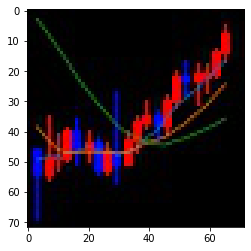

In [ ]:
img_path='/content/drive/MyDrive/coin_data/chart/day/up/BTC_323.jpg'

import matplotlib.pyplot as plt
from PIL import Image

image = plt.imread(img_path)
plt.imshow(image)
plt.show()
plt.close('all')

# Make Chart Using numpy


In [5]:
import numpy as np

def min_max_normalize_ochl(arr):

    highmax=max(df_terminated['HighPrice'])
    lowmin=min(df_terminated['LowPrice'])
    norm_factor=(highmax-lowmin)
    norm_arr=(np.array(arr)-lowmin)/norm_factor
    return norm_arr

def min_max_normalize_ma(arr):

    highmax=max(arr)
    lowmin=min(arr)
    norm_factor=(highmax-lowmin)
    norm_arr=(np.array(arr)-lowmin)/norm_factor
    return norm_arr

def make_chart(df_terminated,img_w,img_h,term,linewidth,alpha,colors):
    date_term=int(img_w/term)
    candle_width=date_term
    ma5=min_max_normalize_ma(df_terminated['MA5'])
    ma10=min_max_normalize_ma(df_terminated['MA10'])
    ma20=min_max_normalize_ma(df_terminated['MA20'])
    high=min_max_normalize_ochl(df_terminated['HighPrice'])
    low=min_max_normalize_ochl(df_terminated['LowPrice'])
    open=min_max_normalize_ochl(df_terminated['OpeningPrice'])
    close=min_max_normalize_ochl(df_terminated['TradePrice'])


    ma5=np.array(ma5*(img_h-1),dtype=np.int8)
    ma10=np.array(ma10*(img_h-1),dtype=np.int8)
    ma20=np.array(ma20*(img_h-1),dtype=np.int8)
    high=np.array(high*(img_h-1),dtype=np.int8)
    low=np.array(low*(img_h-1),dtype=np.int8)
    open=np.array(open*(img_h),dtype=np.int8)
    close=np.array(close*(img_h-1),dtype=np.int8)


    ma5=(img_h-1)-ma5
    ma10=(img_h-1)-ma10
    ma20=(img_h-1)-ma20
    high=(img_h-1)-high
    low=(img_h-1)-low
    open=(img_h-1)-open
    close=(img_h-1)-close

    # Draw Chart
    chart=np.zeros((img_h,img_w,3),dtype=np.int16)
    close_yesterday=0
    today=0
    for i in range(term):
        if close[i]>close_yesterday:
            color=colors['r']
        elif close[i]<close_yesterday:
            color=colors['b']
        elif close[i]==close_yesterday:
            color=colors['g']
        close_yesterday=close[i]

        # Draw high-low
        col_start=today+date_term//2-linewidth//2
        col_finish=today+date_term//2+linewidth//2
        chart[high[i]:low[i]+1,col_start:col_finish,color]=255*alpha

        # Draw open-close
        col_start=today+date_term//2-candle_width//2
        col_finish=today+date_term//2+candle_width//2
        chart[min(open[i],close[i]):max(open[i],close[i])+1,col_start:col_finish,color]=255*alpha

        # # Draw ma line
        # chart[ma5[i],today+date_term//2,:]=(255,255,0)
        # chart[ma10[i],today+date_term//2,:]=(255,0,255)
        # chart[ma20[i],today+date_term//2,:]=(0,255,255)
        # print(ma20[i])

        today+=date_term
    return chart

In [29]:
import matplotlib.image as mpimg
import pandas as pd
import numpy as np

COIN_LIST=['BTC','BCH','BTG','BSV']#,'BCHA','LTC','EOS','ETH','ETC','ZIL','ADA','XRP','DOT','XLM','ATOM']


img_w=80
img_h=60
term=20
linewidth=2
alpha=0.6
colors={'r':0,'b':2,'g':1}
train_val_split_rate=0.8

for coin in COIN_LIST:
    # for time_unit in ['day', '240']:
    for time_unit in ['day']:
        dataset_path=f'/content/drive/MyDrive/coin_data/chart/{time_unit}/'
        df = pd.read_csv(f'/content/drive/MyDrive/coin_data/price/Upbit_{coin}_{time_unit}_Data.csv')

        df['MA5'] = df['TradePrice'].rolling(5).mean()
        df['MA10'] = df['TradePrice'].rolling(10).mean()
        df['MA20'] = df['TradePrice'].rolling(20).mean()

        train_len=int(len(df)*train_val_split_rate)
        val_len=len(df)-train_len
        print(coin)
        print('total :',len(df),'train :',train_len,'  val :',val_len)

        df_train=df.iloc[0:train_len]
        df_val=df.iloc[train_len:]
        dataset={'train':df_train,'val':df_val}
        for key,df_sub in dataset.items():
            end_point=len(df_sub)
            idx=0

            up_count=0
            down_count=0
            
            while True:
                
                df_terminated=df_sub.iloc[idx:idx+term]

                idx+=1
                if idx+term>end_point-term:
                    break

                chart=make_chart(df_terminated,img_w,img_h,term,linewidth,alpha,colors)
                next_price=df.iloc[idx+term]['TradePrice']
                current_price=df_terminated.iloc[-1]['TradePrice']
                
                if next_price>=current_price:
                    up_count+=1
                    path=dataset_path+key+'/up/{0}_{1}.jpg'.format(coin,idx)
                    mpimg.imsave(path,np.array(chart,dtype=np.uint8))

                elif next_price<current_price:
                    down_count+=1
                    path=dataset_path+key+'/down/{0}_{1}.jpg'.format(coin,idx)
                    mpimg.imsave(path,np.array(chart,dtype=np.uint8))

            print(f'subset : {coin}_{key},   up : {up_count},  down : {down_count},   total : {up_count+down_count}')
    print('\n')       


BTC
total : 1305 train : 1044   val : 261
subset : BTC_train,   up : 525,  down : 479,   total : 1004
subset : BTC_val,   up : 42,  down : 179,   total : 221


BCH
total : 1302 train : 1041   val : 261
subset : BCH_train,   up : 464,  down : 537,   total : 1001
subset : BCH_val,   up : 216,  down : 5,   total : 221


BTG
total : 1249 train : 999   val : 250
subset : BTG_train,   up : 435,  down : 524,   total : 959
subset : BTG_val,   up : 188,  down : 22,   total : 210


BSV
total : 888 train : 710   val : 178
subset : BSV_train,   up : 301,  down : 369,   total : 670
subset : BSV_val,   up : 0,  down : 138,   total : 138




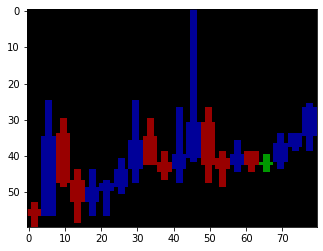

In [31]:
plt.imshow(chart)

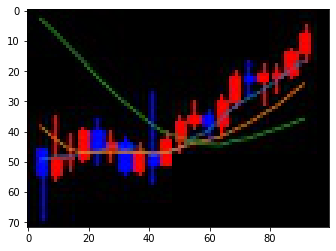

In [ ]:
img_path='/content/drive/MyDrive/coin_data/chart/day/up/BTC_323.jpg'

import matplotlib.pyplot as plt
from PIL import Image

image = plt.imread(img_path)
plt.imshow(image)
plt.show()